In [1]:
import sys
sys.path.append("../..") 

In [2]:
from models.Fed import FedAvg
from models.Nets import MLP

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
import pickle
import os
import json
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4]:
cols = [ 'expiration_id', 'protocol', 'src_port', 'dst_port',
       'ip_version',   'bidirectional_duration_ms', 'bidirectional_packets',
       'bidirectional_bytes', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps',
       'src2dst_min_ps', 'src2dst_mean_ps', 'src2dst_stddev_ps',
       'src2dst_max_ps', 'dst2src_min_ps', 'dst2src_mean_ps',
       'dst2src_stddev_ps', 'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst_min_piat_ms',
       'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms',
       'src2dst_max_piat_ms', 'dst2src_min_piat_ms',
       'dst2src_mean_piat_ms', 'dst2src_stddev_piat_ms',
       'dst2src_max_piat_ms', 'bidirectional_syn_packets', 'bidirectional_ack_packets',
       'bidirectional_psh_packets', 'bidirectional_rst_packets',
       'bidirectional_fin_packets', 'src2dst_syn_packets', 'src2dst_ack_packets',
       'src2dst_psh_packets', 'src2dst_rst_packets',
       'src2dst_fin_packets', 'dst2src_syn_packets', 'dst2src_ack_packets',
       'dst2src_psh_packets', 'dst2src_rst_packets',
       'dst2src_fin_packets','application_name',
       'application_category_name', 'application_is_guessed',
       'application_confidence', 'content_type', 'udps.num_pkts_up_to_128_bytes',
       'udps.num_pkts_128_to_256_bytes', 'udps.num_pkts_256_to_512_bytes',
       'udps.num_pkts_512_to_1024_bytes',
       'udps.num_pkts_1024_to_1514_bytes', 'udps.min_ttl', 'udps.max_ttl',
       'udps.min_ip_pkt_len', 'udps.max_ip_pkt_len', 'udps.src2dst_flags',
       'udps.dst2src_flags', 'udps.tcp_flags', 'udps.tcp_win_max_in',
       'udps.tcp_win_max_out', 'udps.icmp_type', 'udps.icmp_v4_type',
       'udps.dns_query_id', 'udps.dns_query_type', 'udps.dns_ttl_answer',
       'udps.ftp_command_ret_code', 'udps.retransmitted_in_packets',
       'udps.retransmitted_out_packets', 'udps.retransmitted_in_bytes',
       'udps.retransmitted_out_bytes', 'udps.src_to_dst_second_bytes',
       'udps.dst_to_src_second_bytes', 'udps.src_to_dst_avg_throughput',
       'udps.dst_to_src_avg_throughput', 'udps.src_to_dst_second_bytes2',
       'udps.dst_to_src_second_bytes2', 'udps.src_to_dst_avg_throughput2',
       'udps.dst_to_src_avg_throughput2', 'udps.tcp_init_ms',
       'udps.tcp_synack_ack_ms', 'udps.tcp_half_closed_time_ms',
       'udps.num_pkts_after_termination',
       'udps.src2dst_first_packet_payload_len',
       'udps.dst2src_first_packet_payload_len',
       'udps.bidirectional_transport_bytes',
       'udps.bidirectional_payload_bytes', 'udps.src2dst_transport_bytes',
       'udps.src2dst_payload_bytes', 'udps.dst2src_transport_bytes',
       'udps.dst2src_payload_bytes',
       'udps.src2dst_most_freq_payload_ratio',
       'udps.src2dst_most_freq_payload_len',
       'udps.dst2src_most_freq_payload_ratio',
       'udps.dst2src_most_freq_payload_len',
       'udps.bidirectional_mean_packet_relative_times',
       'udps.bidirectional_stddev_packet_relative_times',
       'udps.bidirectional_variance_packet_relative_times',
       'udps.bidirectional_coeff_of_var_packet_relative_times',
       'udps.bidirectional_skew_from_median_packet_relative_times',
       'udps.src2dst_mean_packet_relative_times',
       'udps.src2dst_stddev_packet_relative_times',
       'udps.src2dst_variance_packet_relative_times',
       'udps.src2dst_coeff_of_var_packet_relative_times',
       'udps.src2dst_skew_from_median_packet_relative_times',
       'udps.dst2src_mean_packet_relative_times',
       'udps.dst2src_stddev_packet_relative_times',
       'udps.dst2src_variance_packet_relative_times',
       'udps.dst2src_coeff_of_var_packet_relative_times',
       'udps.dst2src_skew_from_median_packet_relative_times',
       'udps.min_req_res_time_diff', 'udps.max_req_res_time_diff',
       'udps.mean_req_res_time_diff', 'udps.stddev_req_res_time_diff',
       'udps.variance_req_res_time_diff',
       'udps.coeff_of_var_req_res_time_diff',
       'udps.skew_from_median_req_res_time_diff',
       'udps.src2dst_small_packet_payload_packets',
       'udps.src2dst_small_packet_payload_ratio',
       'udps.dst2src_small_packet_payload_packets',
       'udps.dst2src_small_packet_payload_ratio',
       'udps.sent_recv_packet_ratio',
       'udps.bidirectional_ps_first_quartile',
       'udps.bidirectional_ps_second_quartile',
       'udps.bidirectional_ps_third_quartile',
       'udps.bidirectional_ps_median_absoulte_deviation',
       'udps.bidirectional_ps_skewness', 'udps.bidirectional_ps_kurtosis',
       'udps.bidirectional_piat_first_quartile',
       'udps.bidirectional_piat_second_quartile',
       'udps.bidirectional_piat_third_quartile',
       'udps.bidirectional_piat_median_absoulte_deviation',
       'udps.bidirectional_piat_skewness',
       'udps.bidirectional_piat_kurtosis',
       'udps.median_req_res_time_diff', 'Attack']

In [5]:
def port_feature(port):
    if port < 1024:
        return 1
    elif port < 49152 and port >= 1024:
        return 2
    else:
        return 3        

In [6]:
def encode(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    les = {}
    for each in cols:
        le_col = LabelEncoder()
        df[each] = le_col.fit_transform(df[each])
        les[each] = le_col
       
    return df, les

In [7]:
def save_predictions(predictions, targets, timeout, save_path= "results/ET"):
    name_file_pred = 'predictions_idle_' + str(timeout[0]) + "_active_" + str(timeout[1]) + ".p"
    name_file_y = 'targets_idle_' + str(timeout[0]) + "_active_" + str(timeout[1]) + ".p"

    pickle.dump(predictions, open(os.path.join(save_path, name_file_pred), 'wb') )
    pickle.dump(targets, open(os.path.join(save_path, name_file_y), 'wb') )
    
def load_predictions(timeout, save_path= "results/ET"):
    name_file_pred = 'predictions_idle_' + str(timeout[0]) + "_active_" + str(timeout[1]) + ".p"
    name_file_y = 'targets_idle_' + str(timeout[0]) + "_active_" + str(timeout[1]) + ".p"
    
    predictions =  pickle.load(open(os.path.join(save_path, name_file_pred), 'rb') )
    targets =  pickle.load(open(os.path.join(save_path, name_file_y), 'rb') )
    return predictions, targets

In [8]:
timeouts = [(0.5,2), (1, 2), (2,2), (0.5,3), (1,3), (2, 3), (3,3), (0.5,4), (1, 4), (2,4), (3,4), (4,4), (0.5,5), (1,5), (2,5), (3,5), (4,5), (5,5), (0.5, 30), (1, 30), (2,30), (3,30), (4,30), (5,30), (10, 30), (0.5, 60), (1, 60), (2,60), (3,60), (4,60), (5,60), (10, 60)]
len(timeouts)

32

In [10]:
def split_data(data):
    train_idx, test_idx = next(StratifiedKFold(n_splits=3).split(data, data['Attack']))
    train, test = data.iloc[train_idx].reset_index(drop=True), data.iloc[test_idx].reset_index(drop=True)
    return train, test

In [11]:
from configs.net_config import MLPConfig
config = MLPConfig()

In [17]:
import torch

gpu = 0
config.device = torch.device('cuda:{}'.format(gpu) if torch.cuda.is_available() and gpu != -1 else 'cpu')
seed=config.seed
iid=config.iid
config.dataset= "ustc"
all_clients = config.all_clients
config.epochs=15
config.num_users=len(timeouts)
print("Dataset: {}, Model: {}, IID: {}, Data Type : {}, Device : {} ".format(config.dataset, config.model, iid, config.data_type, config.device))

Dataset: ustc, Model: MLP, IID: True, Data Type : tabular, Device : cuda:0 


In [18]:
# build model
if config.model == 'MLP' and config.dataset == 'ustc' and config.data_type == "tabular":
    net_glob = MLP(num_features=57, hidden1_size=32, hidden2_size=16, num_classes=11).to(config.device) 
else:
    exit('Error: unrecognized model')
print(net_glob)

MLP(
  (fc1): Linear(in_features=57, out_features=32, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=16, out_features=11, bias=True)
)


In [19]:
from models.Update import LocalUpdate
import copy

preprocessing=False
if preprocessing:
    for timeout in timeouts:
        print("Processing timeout : ", timeout)
        idle, active = timeout
        out_dir = f'/home/meryem.janati/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/janati/IDS/project2/extractions/extractions/new_idle_{idle}min_active_{active}min/USTC-TF2016'
        df = pd.read_csv(out_dir+"/USTC-TF2016.csv")
        '''
        try:
            df = df.rename(columns={"attack_category": "Attack"})
            df.to_csv(out_dir+"/USTC-TF2016.csv", index=False, header=True)
        except:
            pass
        '''

        df = df[~df.Attack.str.contains('direction_flip')]
        df = df.sort_values(by=['bidirectional_last_seen_ms']).reset_index(drop=True)
        df_new = df[cols]
        df_new['application_name'] = df_new['application_name'].apply(lambda x: x.split(".")[0])
        df_new['content_type'] = df_new['content_type'].fillna("unkown/unkown")
        df_new['content_sub_type'] = df_new['content_type'].apply(lambda x: x.split("/")[1])
        df_new['content_type'] = df_new['content_type'].apply(lambda x: x.split("/")[0])
        #df_new['src_port'] = df_new['src_port'].apply(lambda x: port_feature(x))
        #df_new['dst_port'] = df_new['dst_port'].apply(lambda x: port_feature(x))
        df_new = df_new.fillna(0)
        categ_cols = ["application_name", "application_category_name", "content_sub_type", "content_type" ]
        df_new, lbl_encoders = encode(df_new,categ_cols)    
        train, test = split_data(df_new)
        y_train = train['Attack']
        X_train = train.drop('Attack', axis=1)
        y_test = test['Attack']
        X_test = test.drop('Attack', axis=1)
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)
        y_test = le.transform(y_test)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        print("Saving data for timeout: ", timeout)
        np.save(os.path.join('../../data/USTC-TFC2016/baselineFeatures/X_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), X_train)
        np.save(os.path.join('../../data/USTC-TFC2016/baselineFeatures/y_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), y_train)
        np.save(os.path.join('../../data/USTC-TFC2016/baselineFeatures/X_test_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), X_test)
        np.save(os.path.join('../../data/USTC-TFC2016/baselineFeatures/y_test_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), y_test)

In [20]:
from models.Update import LocalUpdate
import copy

def FL_training():
    #net_glob = MLP(dim_in=46, dim_hidden=32, dim_out=le.classes_).to(config.device) 
    net_glob.train()
    # copy weights
    w_glob = net_glob.state_dict()
    print("Training ... ")
    net_loss_train = []


    if config.all_clients: 
        print("Aggregation over all clients")
        w_net_locals = [w_glob for i in range(config.num_users)]

    for iter in range(config.epochs):
        net_loss_locals = []
        X_train, y_train = None, None
        if not config.all_clients:
            w_net_locals = []
        m = max(int(config.frac * config.num_users), 1)
        idxs_timeouts = np.random.choice(range(config.num_users), m, replace=False)
        for idx in idxs_timeouts:
            timeout = timeouts[idx]
            X_train = np.load(os.path.join('../../data/USTC-TFC2016/baselineFeatures/X_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
            y_train = np.load(os.path.join('../../data/USTC-TFC2016/baselineFeatures/y_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
            
            local = LocalUpdate(config=config, x_train=X_train, y_train=y_train)
            w_net, net_loss = local.train_net(net=copy.deepcopy(net_glob).to(config.device), timeout=timeout)

            w_net = w_net.state_dict()
            if config.all_clients:
                w_net_locals[idx] = copy.deepcopy(w_net)
            else:
                w_net_locals.append(copy.deepcopy(w_net))

            net_loss_locals.append(copy.deepcopy(net_loss))
        # update global weights
        w_glob = FedAvg(w_net_locals)

        # copy weight to net_glob
        net_glob.load_state_dict(w_glob)

        # print loss
        net_loss_avg = sum(net_loss_locals) / len(net_loss_locals)
        print('Round {:3d}, Average MLP loss {:.3f}'.format(iter, net_loss_avg))
        net_loss_train.append(net_loss_avg)

    #save_model(config.local_ep, net_glob, filepath) 
FL_training()

Training ... 
Timeout : (3, 5) 	Local Epoch : 0 	Loss: 0.390344
Timeout : (3, 5) 	Local Epoch : 1 	Loss: 0.241605
Timeout : (3, 5) 	Local Epoch : 2 	Loss: 0.223064
Timeout : (3, 5) 	Local Epoch : 3 	Loss: 0.209267
Timeout : (3, 5) 	Local Epoch : 4 	Loss: 0.196343
Timeout : (3, 3) 	Local Epoch : 0 	Loss: 0.401664
Timeout : (3, 3) 	Local Epoch : 1 	Loss: 0.246217
Timeout : (3, 3) 	Local Epoch : 2 	Loss: 0.225520
Timeout : (3, 3) 	Local Epoch : 3 	Loss: 0.210255
Timeout : (3, 3) 	Local Epoch : 4 	Loss: 0.197254
Timeout : (0.5, 4) 	Local Epoch : 0 	Loss: 0.431717
Timeout : (0.5, 4) 	Local Epoch : 1 	Loss: 0.275198
Timeout : (0.5, 4) 	Local Epoch : 2 	Loss: 0.253327
Timeout : (0.5, 4) 	Local Epoch : 3 	Loss: 0.237377
Timeout : (0.5, 4) 	Local Epoch : 4 	Loss: 0.223359
Timeout : (2, 5) 	Local Epoch : 0 	Loss: 0.397318
Timeout : (2, 5) 	Local Epoch : 1 	Loss: 0.246797
Timeout : (2, 5) 	Local Epoch : 2 	Loss: 0.227351
Timeout : (2, 5) 	Local Epoch : 3 	Loss: 0.214325
Timeout : (2, 5) 	Local Ep

# Testing the global model on the combined test set of all clients

In [21]:
X_test, y_test = None, None
all_accuracy, all_f1Score, all_recall, all_precision = {}, {}, {}, {}

for i, timeout in enumerate(timeouts):
    if i == 0:
        X_test = np.load(os.path.join('../../data/USTC-TFC2016/baselineFeatures/X_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
        y_test = np.load(os.path.join('../../data/USTC-TFC2016/baselineFeatures/y_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
    else:
        X = np.load(os.path.join('../../data/USTC-TFC2016/baselineFeatures/X_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
        y = np.load(os.path.join('../../data/USTC-TFC2016/baselineFeatures/y_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
        X_test = np.concatenate((X_test, X), axis=0)
        y_test = np.concatenate((y_test, y), axis=0)

In [22]:
X_test.shape, y_test.shape

((12092769, 57), (12092769,))

In [23]:
#from models.evaluate import get_thr #,evaluate_ae
import numpy as np
from sklearn.metrics import classification_report
import torch.nn as nn
import torch
from torch.utils.data import DataLoader, TensorDataset
import tqdm

# ------------------ Start Testing ----------------------#
print("Testing ... ")
test_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test))
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, drop_last=True)


def test(config, model, test_loader):


    model.eval()

    history = {
        'test': {
            'total': 0,
            'loss': 0.0,
            'accuracy': 0.0,
            'output_pred': [],
            'output_true': [],
            'output_pred_prob': []
        }
    }

    test_loss = 0.0
    test_steps = 0
    test_total = 0
    test_correct = 0

    test_output_pred = []
    test_output_true = []
    test_output_pred_prob = []
    
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs, labels = inputs.to(config.device), labels.type(torch.LongTensor).to(config.device)
            #labels = labels.squeeze(1)

            outputs = model(inputs)
            
            loss = criterion(outputs, labels)
            test_loss += loss.cpu().item()
            test_steps += 1

            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

            test_output_pred += outputs.argmax(1).cpu().tolist()
            test_output_true += labels.tolist()
            test_output_pred_prob += nn.functional.softmax(outputs, dim=0).cpu().tolist()

    history['test']['total'] = test_total
    history['test']['loss'] = test_loss/test_steps
    history['test']['accuracy'] = test_correct/test_total
    history['test']['output_pred'] = test_output_pred
    history['test']['output_true'] = test_output_true
    history['test']['output_pred_prob'] = test_output_pred_prob

    return history

history=test(config, net_glob, test_loader)

Testing ... 


In [24]:
test_output_true = history['test']['output_true']
test_output_pred = history['test']['output_pred']
test_output_pred_prob = history['test']['output_pred_prob']

classes = ['Benign', 'Cridex', 'Geodo', 'Htbot', 'Miuref', 'Neris', 'Nsis-ay', 'Shifu',
 'Tinba', 'Virut', 'Zeus']

print("Testing Set -- Classification Report", end="\n\n")
print(classification_report(test_output_true, test_output_pred, target_names=classes))

Testing Set -- Classification Report

              precision    recall  f1-score   support

      Benign       0.95      0.98      0.97   6610918
      Cridex       0.69      0.76      0.72   1320953
       Geodo       0.64      0.37      0.47   1089172
       Htbot       0.59      0.58      0.58    185139
      Miuref       0.76      0.72      0.74    339776
       Neris       0.50      0.79      0.61    861433
     Nsis-ay       0.92      0.95      0.93    162592
       Shifu       0.98      0.53      0.69    243775
       Tinba       0.83      0.16      0.27    220776
       Virut       0.97      0.89      0.93    806091
        Zeus       0.67      0.61      0.64    252143

    accuracy                           0.84  12092768
   macro avg       0.77      0.67      0.69  12092768
weighted avg       0.84      0.84      0.83  12092768



In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve


acc = accuracy_score(test_output_true, test_output_pred)
precision = precision_score(test_output_true, test_output_pred, average='macro')
recall = recall_score(test_output_true, test_output_pred, average='macro')
f1Score = f1_score(test_output_true, test_output_pred, average='macro')

print('\nAccuracy: {:.4f}\n'.format(acc))

print('Micro Precision: {:.4f}'.format(precision_score(test_output_true, test_output_pred, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(test_output_true, test_output_pred, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(test_output_true, test_output_pred, average='micro')))

print('Macro Precision: {:.4f}'.format(precision))
print('Macro Recall: {:.4f}'.format(recall))
print('Macro F1-score: {:.4f}\n'.format(f1Score))

print('Weighted Precision: {:.4f}'.format(precision_score(test_output_true, test_output_pred, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(test_output_true, test_output_pred, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(test_output_true, test_output_pred, average='weighted')))

all_accuracy["all_test_sets"] = acc
all_precision["all_test_sets"] = precision
all_recall["all_test_sets"] = recall
all_f1Score["all_test_sets"] = f1Score




Accuracy: 0.8368

Micro Precision: 0.8368
Micro Recall: 0.8368
Micro F1-score: 0.8368

Macro Precision: 0.7725
Macro Recall: 0.6673
Macro F1-score: 0.6866

Weighted Precision: 0.8441
Weighted Recall: 0.8368
Weighted F1-score: 0.8289


# Testing the global model on the each client seperatly

In [26]:
X_test, y_test = None, None
for i, timeout in enumerate(timeouts):
    X_test = np.load(os.path.join('../../data/USTC-TFC2016/baselineFeatures/X_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
    y_test = np.load(os.path.join('../../data/USTC-TFC2016/baselineFeatures/y_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
    test_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test))
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, drop_last=True)
    
    history=test(config, net_glob, test_loader)

    test_output_true = history['test']['output_true']
    test_output_pred = history['test']['output_pred']
    test_output_pred_prob = history['test']['output_pred_prob']

    all_accuracy[str(timeout)] = accuracy_score(test_output_true, test_output_pred)
    all_f1Score[str(timeout)] = f1_score(test_output_true, test_output_pred, average='macro')  
    all_precision[str(timeout)] = precision_score(test_output_true, test_output_pred, average='macro')
    all_recall[str(timeout)] = recall_score(test_output_true, test_output_pred, average='macro')
    
    print("Timenout : {} \tAccuracy={:.4f} \tF1_score={:.4f}".format(timeout, all_accuracy[str(timeout)], all_f1Score[str(timeout)]))

Timenout : (0.5, 2) 	Accuracy=0.7940 	F1_score=0.6183
Timenout : (1, 2) 	Accuracy=0.8413 	F1_score=0.6757
Timenout : (2, 2) 	Accuracy=0.8490 	F1_score=0.6900
Timenout : (0.5, 3) 	Accuracy=0.7963 	F1_score=0.6217
Timenout : (1, 3) 	Accuracy=0.8451 	F1_score=0.6794
Timenout : (2, 3) 	Accuracy=0.8630 	F1_score=0.7124
Timenout : (3, 3) 	Accuracy=0.8671 	F1_score=0.7229
Timenout : (0.5, 4) 	Accuracy=0.8067 	F1_score=0.6125
Timenout : (1, 4) 	Accuracy=0.8502 	F1_score=0.6887
Timenout : (2, 4) 	Accuracy=0.8658 	F1_score=0.7171
Timenout : (3, 4) 	Accuracy=0.8698 	F1_score=0.7304
Timenout : (4, 4) 	Accuracy=0.8857 	F1_score=0.7988
Timenout : (0.5, 5) 	Accuracy=0.8078 	F1_score=0.6141
Timenout : (1, 5) 	Accuracy=0.8579 	F1_score=0.6981
Timenout : (2, 5) 	Accuracy=0.8681 	F1_score=0.7254
Timenout : (3, 5) 	Accuracy=0.8862 	F1_score=0.7906
Timenout : (4, 5) 	Accuracy=0.9007 	F1_score=0.8461
Timenout : (5, 5) 	Accuracy=0.9051 	F1_score=0.8557
Timenout : (0.5, 30) 	Accuracy=0.8418 	F1_score=0.6679
T

In [27]:
results = {"accuracy": all_accuracy, "f1Score":all_f1Score, "precision": all_precision, "recall":all_recall}

results

{'accuracy': {'all_test_sets': 0.8367936935530393,
  '(0.5, 2)': 0.7939723926380368,
  '(1, 2)': 0.841269549314723,
  '(2, 2)': 0.848975531284396,
  '(0.5, 3)': 0.7963480271774722,
  '(1, 3)': 0.8451303422405799,
  '(2, 3)': 0.8630345150046757,
  '(3, 3)': 0.8670829069668287,
  '(0.5, 4)': 0.8066834875532264,
  '(1, 4)': 0.8501523490215924,
  '(2, 4)': 0.8658388661899897,
  '(3, 4)': 0.8698090144333419,
  '(4, 4)': 0.8857042133151013,
  '(0.5, 5)': 0.8077728296478296,
  '(1, 5)': 0.857897012910303,
  '(2, 5)': 0.8681223916191125,
  '(3, 5)': 0.8862376057782716,
  '(4, 5)': 0.9007480323380956,
  '(5, 5)': 0.9050887276307903,
  '(0.5, 30)': 0.8418474475581776,
  '(1, 30)': 0.8387106141240074,
  '(2, 30)': 0.8736480288420514,
  '(3, 30)': 0.8737658485393643,
  '(4, 30)': 0.8198018528049408,
  '(5, 30)': 0.8075878285517952,
  '(10, 30)': 0.7855896701085054,
  '(0.5, 60)': 0.8030684053101697,
  '(1, 60)': 0.8086983610712174,
  '(2, 60)': 0.8139080901177675,
  '(3, 60)': 0.8065932653585811,


In [28]:
import json
with open('../../save/results/USTC-TFC2016/{}_{}_E[{}]_R[{}].json'.format(config.dataset, config.model, config.local_ep,config.epochs), 'w') as f:
    json.dump(results, f)

['All', '(0.5,2)', '(1, 2)', '(2,2)', '(0.5,3)', '(1,3)', '(2, 3)', '(3,3)', '(0.5,4)', '(1, 4)', '(2,4)', '(3,4)', '(4,4)', '(0.5,5)', '(1,5)', '(2,5)', '(3,5)', '(4,5)', '(5,5)', '(0.5, 30)', '(1, 30)', '(2,30)', '(3,30)', '(4,30)', '(5,30)', '(10, 30)', '(0.5, 60)', '(1, 60)', '(2,60)', '(3,60)', '(4,60)', '(5,60)', '(10, 60)']


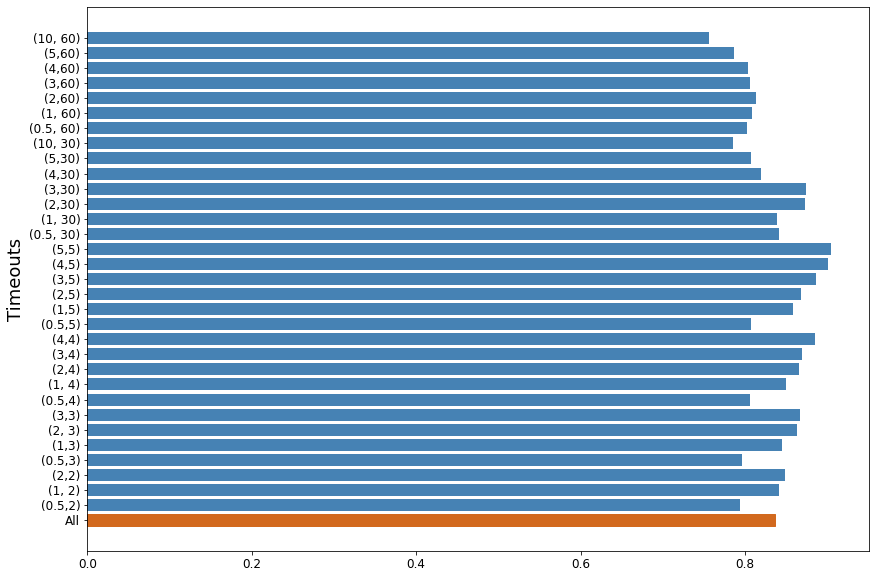

In [14]:
import matplotlib.pyplot as plt
import json
plt.figure(figsize=(14, 10))


load_json=True
if load_json:
    f = open('../../save/results/USTC-TFC2016/addFeatures/ustc_MLP_E[5]_R[15].json')
    results = json.load(f)
    f.close()
    

time = timeouts = ["All", "(0.5,2)", "(1, 2)", "(2,2)","(0.5,3)", "(1,3)", "(2, 3)", "(3,3)", "(0.5,4)", "(1, 4)", "(2,4)", "(3,4)", "(4,4)", "(0.5,5)", "(1,5)", "(2,5)", "(3,5)",
                   "(4,5)", "(5,5)", "(0.5, 30)", "(1, 30)", "(2,30)", "(3,30)", "(4,30)", "(5,30)", "(10, 30)", "(0.5, 60)", "(1, 60)", "(2,60)", "(3,60)", "(4,60)", "(5,60)", "(10, 60)"]

acc= list(results["accuracy"].values())
print(time)

bars = plt.barh(time, acc, height = 0.8, color='steelblue')
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
bars[0].set_color('chocolate')
plt.ylabel('Timeouts', fontsize=18)
#plt.xlabel('Accuracy', fontsize=18)
#plt.title('F1-score for each timeout')
#plt.grid(which="major", axis="both", linestyle='-', linewidth=0.5)
plt.savefig("../../save/plts/USTC-TFC2016/FL_ustc_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()


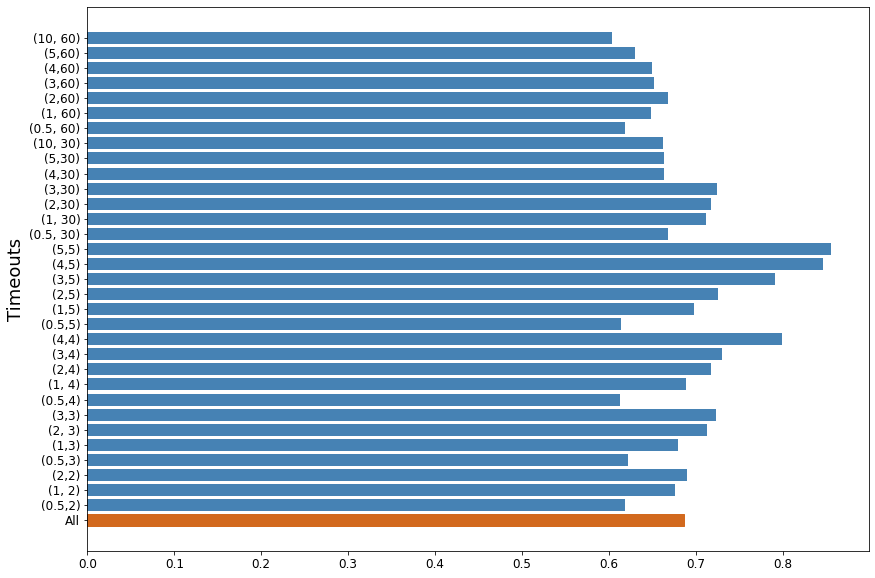

In [15]:
plt.figure(figsize=(14, 10))

f1_score= list(results["f1Score"].values())

bars = plt.barh(time, f1_score, height = 0.8, color='steelblue')
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
bars[0].set_color('chocolate')
plt.ylabel('Timeouts', fontsize=18)
#plt.xlabel('F1-score')
#plt.title('F1-score for each timeout')
#plt.grid(which="major", axis="both", linestyle='-', linewidth=0.5)
plt.savefig("../../save/plts/USTC-TFC2016/FL_ustc_f1.pdf", format="pdf", bbox_inches="tight")
plt.show()